## <center>The Shooting Method <center>
The shooting methods are developed with the goal of transforming the ODE boundary value problems to an equivalent initial value problems. In the initial value problems, we can start at the initial value and march forward to get the solution. But this method is not working for the boundary value problems, because there are not enough initial value conditions to solve the ODE to get a unique solution. Therefore, the shooting methods was developed to overcome this difficulty.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

Fins are used in many applications to increase the heat transfer from surfaces. Usually the design of cooling pin fins is encountered in many applications, such as the pin fin used as a heat sink for cooling an object. We can model the temperature distribution in a pin fin as shown in the following figure, where the length of the fin is L
, and the start and the end of the fin is x=0
 as well as x=L
. The temperature at the two ends are T0
 and TL
. Ts
 is the temperature of the surrounding environment. If we consider both convection and radiation, the steady-state temperature distribution of the pin fin T(x)
 between x=0
 and x=L
 can be modeled with the following equation:

**Ex:**

The heat balance for a long thin rod with radiation taken into consideration is given by the equation:
$$\frac{d^2T}{dx^2} -h''(T_a - T)^4 = 0$$

Per unit surface area. The two boundary conditions are given as $T(x = 0) = 40°C$ and $T(x = 10) = 200°C$. Solve for the temperature distribution as a function of $x$ with $h'' = 5x10^{-8}K^{-3}m^{-2}$, $Ta = 20°C$
numerically.

In [2]:
def ode(t, vars):
    T = vars[0]
    T_p = vars[1]

    # Parameters
    h = 5e-8
    Ta = 20

    dTdt = T_p
    dT_pdt = h*(Ta - T)**4

    return[dTdt, dT_pdt]


def func(v0, f=ode):
    # Initial conditions
    vals0 = [40, v0]
    
    
    # Length integration tuple
    x0, xf = 0, 10
    x_tuple = (x0, xf)
    
    sol = solve_ivp(f, x_tuple, y0=vals0, method="RK45")
    y = sol.y[0]

    fun = 200 - y[-1]
    return fun

v0, = fsolve(func, x0=10)
print(v0)

9.294887143280055


c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\integrate\_ivp\base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)
c:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


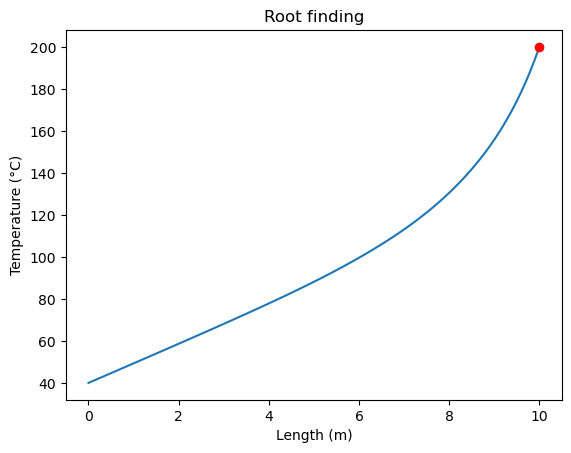

In [3]:
x = np.linspace(0, 10, 100)
x0, xf = 0, 10
x_tuple = (x0, xf)
vals0 = [40, v0]


sol = solve_ivp(ode, x_tuple, y0=vals0, method="RK45", t_eval=x)

plt.plot(sol.t, sol.y[0])
plt.plot(10, 200, 'ro')
plt.xlabel('Length (m)')
plt.ylabel('Temperature (°C)')
plt.title(f'Root finding')
plt.show()
